# Проект 4. Анализ данных о перелетах

## 1. Исследовательский анализ

In [2]:
import pandas as pd
models = pd.read_csv('/datasets/query_1.csv') # импортируем результаты первого запроса
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
models.info() # проверяем на корректность тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [4]:
cities = pd.read_csv('/datasets/query_3.csv') # импортируем результаты третьего запроса
cities.head(20)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [5]:
cities.info() # проверяем на корректность тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Проверим дополнительно таблицу со средним количеством рейсов в день на выбросы.

In [6]:
cities.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Выберем TOP-10 городов с наибольшим количеством рейсов.

In [7]:
cities.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Результаты выглядят логично, максимальное количество прилетов - в Москве, за которой следует Петербург, а затем города-миллионники.

Теперь построим графики:  
- количество рейсов для каждой модели самолетов;
- города и количество рейсов;
- ТОП-10 городов и количество рейсов.

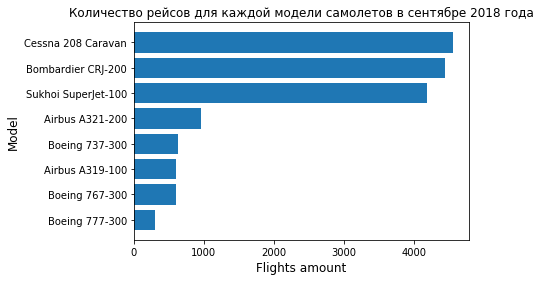

In [8]:
import matplotlib.pyplot as plt # импортируем нужные библиотеки
%matplotlib inline
import numpy as np
models_sorted = models.sort_values(by='flights_amount') # отсортируем
index = np.arange(len(models_sorted))
plt.barh(index, models_sorted.flights_amount)
plt.ylabel('Model', fontsize=12)
plt.xlabel('Flights amount', fontsize=12)
plt.yticks(index, models_sorted.model, fontsize=10)
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года')
plt.show()

Наибольшее количество полетов совершили самолеты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi Superjet-100.  
Реже всего летали Боинги 777-300.

Наибольшее количество рейсов - у небольших самолетов (бизнес-авиация, как Cessna, или среднемагистральные как Bombardier).  
Большие самолеты задействованы лишь для долгих перелетов.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf041fdeb8>]],
      dtype=object)

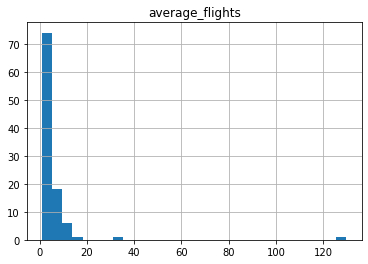

In [9]:
cities.hist(bins=30)

Большая часть городов принимает в среднем менее 20 рейсов в день.  
Посмотрим на этот диапазон внимательнее.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdefaf10f60>]],
      dtype=object)

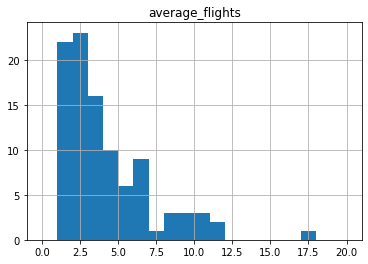

In [10]:
cities.hist(bins=20, range=(0,20))

Большая часть городов принимают в среднем не более 5 рейсов в день.

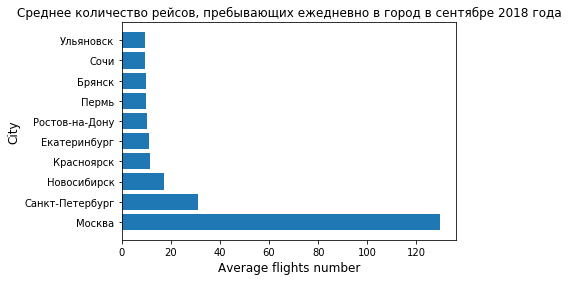

In [11]:
cities_TOP = cities.sort_values(by='average_flights', ascending=False).head(10) # отберем TOP-10 городов
index = np.arange(len(cities_TOP))
plt.barh(index, cities_TOP.average_flights)
plt.ylabel('City', fontsize=12)
plt.xlabel('Average flights number', fontsize=12)
plt.yticks(index, cities_TOP.city, fontsize=10)
plt.title('Среднее количество рейсов, пребывающих ежедневно в город в сентябре 2018 года')
plt.show()

Кроме Москвы, Петербурга и крупнейших "миллионников" в TOP-10 входят Ульяновск, Сочи и Брянск.

Городов слишком много, поэтому я решил построить вместо этого гистограмму с распределением городов по количеству перелетов.  
Ниже построил по всем 100 городам, но она не читается, возможно, я неправильно понимаю задачу?

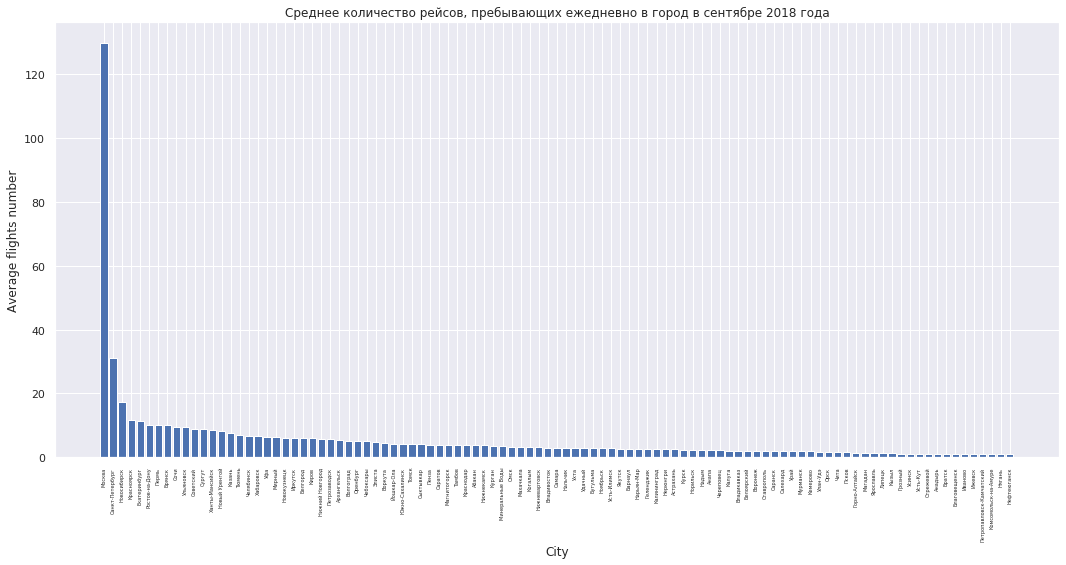

In [13]:
cities_sorted = cities.sort_values(by='average_flights', ascending=False)
index = np.arange(len(cities_sorted))
plt.bar(index, cities_sorted.average_flights)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average flights number', fontsize=12)
plt.xticks(index, cities_sorted.city, fontsize=5, rotation=90)
plt.title('Среднее количество рейсов, пребывающих ежедневно в город в сентябре 2018 года')
plt.show()

## 2. Проверка статистических гипотез

Импортируем нужный датасет.

In [14]:
ticket_amount = pd.read_csv('/datasets/query_last.csv') 
ticket_amount

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Для начала сформулируем нулевую и альтернативную гипотезы:  
а) нулевая гипотеза - cредний спрос на билеты во время фестивалей НЕ ОТЛИЧАЕТСЯ от среднего спроса на билеты в обычное время  
в) альтернативная гипотеза - cредний спрос на билеты во время фестивалей ОТЛИЧАЕТСЯ от среднего спроса на билеты в обычное время

Поскольку выборки не являются зависимыми (оцениваются различные жанры), будем использовать для проверки гипотез метод scipy.stats.ttest_ind.  
Критический уровень значимости alpha зададим как 0.05.

In [15]:
from scipy import stats as st #импортируем нужную библиотеку

tickets_amount_festival = ticket_amount.query('~festival_week.isnull()')['ticket_amount']
tickets_amount_non_festival = ticket_amount.query('festival_week.isnull()')['ticket_amount']

alpha = .05

results = st.ttest_ind(tickets_amount_festival, tickets_amount_non_festival, equal_var=False) # ставим параметр equal_var=False, поскольку нет оснований предполагать одинаковую дисперсию

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средний спрос на билеты во время фестивалей ОТЛИЧАЕТСЯ от среднего спроса на билеты в обычное время")
else:
    print("Средний спрос на билеты во время фестивалей НЕ ОТЛИЧАЕТСЯ от среднего спроса на билеты в обычное время")

p-значение: 0.377432493172683
Средний спрос на билеты во время фестивалей НЕ ОТЛИЧАЕТСЯ от среднего спроса на билеты в обычное время


Посмотрим на сами средние значения.

In [16]:
print("Среднее количество проданных билетов в те недели, когда проводились фестивали: {:.0f}".format(tickets_amount_festival.mean()))
print("Среднее количество проданных билетов в те недели, когда не проводились фестивали: {:.0f}".format(tickets_amount_non_festival.mean()))

Среднее количество проданных билетов в те недели, когда проводились фестивали: 48663
Среднее количество проданных билетов в те недели, когда не проводились фестивали: 51531


Любопытно, что в те недели, когда фестивалей не было, среднее количество проданных билетов даже ниже, хотя значимых отличий и нет.

### Результаты анализа

После анализа данных можно сделать следующие выводы.  
1. Если говорить о количестве рейсов для различных моделей самолетов, то наибольшее количество полетов совершили самолеты бизнес-авиации Cessna 208 Caravan и среднемагистральные Bombardier CRJ-200 и Sukhoi Superjet-100. Реже всего летали Боинги 777-300, используемые при длительных перелетах. Очевидно, что доля рейсов на небольшие расстояния выше, поэтому количество рейсов на небольших самолетах больше.  
2. В соответствии с данными, наибольшее количество рейсов принимали в сентябре 2018 года аэропорты Москвы (более 120 ежедневно). На втором месте Петербург, за которым идут несколько городов-"миллионников".  
3. Большая часть городов принимают в среднем не более 5 рейсов в день.  
4. Несмотря на то, что можно было бы предполагать увеличение пассажиропотока в Москве в дни крупных фестивалей, статистический анализ не показывает, что средний спрос на билеты в эти периоды значимо отличается от среднего спроса на билеты в обычное время.